In [1]:
import pandas as pd

In [2]:
from text_processing import Preprocessor, Vectorizer, SentimentAnalyzer, KeywordExtractor

In [3]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

df = pd.read_sql_query("SELECT * FROM testing.azs_review order by object_id", conn)

cur.close()
conn.close()

C:\Users\an23m\AppData\Local\Temp\ipykernel_5372\2666594234.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM testing.azs_review order by object_id", conn)


### Предобработка

In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
words_to_remove = {'не', 'всегда', 'лучше', 'никогда', 'хорошо', 'нет', 'нельзя', 'можно'}
for word in words_to_remove:
    stop_words.discard(word)

abbreviations = {
    "хз": "не знаю",
    "незн": "не знаю",
    "щас": "сейчас",
    "чё": "что",
    "спс": "спасибо",
    "щас": "сейчас",
    "чот": "что-то",
    "пж": "пожалуйста",
    "норм": "нормально",
    "кст": "кстати",
    "мб": "может быть",
    "тк": "так как",
    "всм": "в смысле",
    "чел": "человек",
    "блин": "ужас",
    "плз": "пожалуйста"
}

In [5]:
preprocessor = Preprocessor(stop_words) # ,abbreviations

In [6]:
from concurrent.futures import ThreadPoolExecutor
if 'cleaned_text' not in df.columns:
        texts = df['comment_text'].tolist()  # Преобразуем столбец в список
        with ThreadPoolExecutor(max_workers=10) as executor:
            cleaned_texts = list(executor.map(preprocessor.clean_text, texts))
        df['cleaned_text'] = cleaned_texts
        print("Предобработка текста завершена и добавлена в 'cleaned_text'.")

KeyboardInterrupt: 

### Векторизация

In [7]:
tokenized_rev = pd.read_csv("all_preprocessed.csv")

In [8]:
tokenized_rev

,object_id,comment_type,comment_time,author_id,profession_level_num,rating,comment_text,likes_num,dislikes_num,date_of_pars,hist_file_load_id,cleaned_text
0,1004394051,/ugc/review,2024-08-21 08:40:36.511,6463yeagmbaugdkbp9y9ak6ckg,3,5.0,Плюсы: Вежливое обслуживание. Горячий кофе. Но...,1,0,2024-09-22 19:11:48+00:00,3,"['плюс', 'вежливый', 'обслуживание', 'горячий'..."
1,1004394051,/ugc/review,2024-08-26 09:14:35.621,2zhrztyn3j9apk485nktey9e80,14,4.0,Был пару раз заправка как заправка только не в...,0,0,2024-09-22 19:11:48+00:00,3,"['пара', 'заправка', 'заправка', 'не', 'видно'..."
2,1004394051,/ugc/review,2024-08-29 12:01:41.872,5p4zc3y74pk9ffcx7p071qtyf0,7,5.0,Всегда хорошие и веселые сотрудники. Вкусные х...,0,0,2024-09-22 19:11:48+00:00,3,"['всегда', 'хороший', 'весёлый', 'сотрудник', ..."
3,1004394051,/ugc/review,2024-09-02 20:16:11.641,0n0nz7jbj3tmnjj40q1bhv8cqg,6,5.0,Самая любимая заправка.,2,0,2024-09-22 19:11:48+00:00,3,"['самая', 'любимый', 'заправка']"
4,1004394051,/ugc/review,2016-05-24 23:08:56.000,twzk2t9fk82w6pv5jcygmc6w84,8,1.0,Нет дизеля (((,4,0,2024-09-22 19:11:48+00:00,3,"['нет', 'дизель']"
...,...,...,...,...,...,...,...,...,...,...,...,...
168849,245596964645,/ugc/review,2019-10-19 20:08:37.754,vwgntqaxahaz9y9khh7z81ux98,27,5.0,Хорошая заправка!,4,0,2024-09-22 19:11:48+00:00,3,"['хороший', 'заправка']"
168850,245596964645,/ugc/review,2019-10-20 13:57:04.892,z1ux877fph2qaj03gvmjmhjba4,12,2.0,Цена не радует,3,2,2024-09-22 19:11:48+00:00,3,"['цена', 'не', 'радовать']"
168851,245596964645,/ugc/review,2019-10-20 17:18:36.411,2je1h7qahnunwh9uz4kr8dpqwg,16,4.0,"Топливо, магазин, сервис на высоте.",6,1,2024-09-22 19:11:48+00:00,3,"['топливо', 'магазин', 'сервис', 'высота']"
168852,245596964645,/ugc/review,2019-10-22 13:08:08.705,y3k11xa99n2yjpuq7y82w856t8,12,5.0,Самая приветливая заправка)),3,1,2024-09-22 19:11:48+00:00,3,"['самая', 'приветливый', 'заправка']"


Загрузите предобученную модель Navec:

In [33]:
from navec import Navec

path = 'model\\navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [10]:
tokenized_reviews = tokenized_rev['cleaned_text']
import ast
# Преобразуем каждую строку в список
tokenized_reviews = tokenized_reviews.apply(ast.literal_eval)

In [25]:
from collections import Counter

# Список всех токенов из отзывов
all_tokens = [token for review in tokenized_reviews for token in review]
# Подсчет частотности слов
word_counts = Counter(all_tokens)

# Определение отсутствующих в модели слов
unknown_words = {word: count for word, count in word_counts.items() if word not in navec}
# Сортировка словаря по убыванию значений
unknown_words = sorted(unknown_words.items(), key=lambda x: x[1], reverse=True)

# Создание DataFrame
unknown_words = pd.DataFrame(unknown_words, columns=['Слово', 'Частота'])
unknown_words.head(50)

,Слово,Частота
0,95,2740
1,100,1663
2,10,1136
3,бенз,1123
4,экто,1056
5,\n\n,947
6,92,929
7,,877
8,бонусный,806
9,20,623


Дообучение

In [11]:
from gensim.models import Word2Vec

# Обучение модели на собственных данных
my_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, epochs=10)

In [26]:
my_model.wv.most_similar('бензин')

[('топливо', 0.7718262076377869),
 ('бенз', 0.6882372498512268),
 ('бенза', 0.5183131098747253),
 ('дизель', 0.4736570417881012),
 ('дт', 0.44416916370391846),
 ('казаться', 0.4402461349964142),
 ('аи', 0.43509605526924133),
 ('бензине', 0.43040457367897034),
 ('дизтопливо', 0.42788636684417725),
 ('горючее', 0.41344863176345825)]

In [22]:
my_model.save("model\\my_word2vec_model_full_10.model")

In [ ]:
from gensim.models import Word2Vec

# Обучение модели на собственных данных
my_model_15 =   

In [28]:
my_model_15.wv.most_similar('бензин')

[('топливо', 0.7679861783981323),
 ('бенз', 0.6566876769065857),
 ('бенза', 0.45831117033958435),
 ('аи', 0.4389108121395111),
 ('бензине', 0.4365941286087036),
 ('дизель', 0.4334673285484314),
 ('дизтопливо', 0.4290488362312317),
 ('дт', 0.4279335141181946),
 ('95й', 0.41972482204437256),
 ('горючее', 0.3963017165660858)]

In [30]:
my_model_15.save("model\\my_word2vec_model_16.model")

In [21]:
from gensim.models import Word2Vec

# Обучение модели на собственных данных
my_model_20 = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, epochs=20)

In [25]:
my_model_20.wv.most_similar('бензин')

[('топливо', 0.7789238691329956),
 ('бенз', 0.6324388384819031),
 ('бенза', 0.43328389525413513),
 ('аи', 0.41164645552635193),
 ('бензине', 0.38717496395111084),
 ('92й', 0.3803746700286865),
 ('95й', 0.37648075819015503),
 ('92', 0.37413284182548523),
 ('бензом', 0.3708576560020447),
 ('дизель', 0.36667537689208984)]

In [29]:
my_model_20.save("model\\my_word2vec_model_20.model")

In [29]:
my_model.save("model\\my_word2vec_model.model")

In [30]:
my_model = Word2Vec.load("model\\my_word2vec_model.model")

In [31]:
my_model = Word2Vec.load("model\\my_word2vec_model_16.model")

In [34]:
from navec import Navec

path = "model\\navec_hudlit_v1_12B_500K_300d_100q.tar"
navec_model = Navec.load(path)
# Создание словаря для объединённых векторов
combined_vectors = {}

# Добавьте векторы из Navec
for word in navec_model.vocab.words:
  combined_vectors[word] = navec_model[word]
# Добавьте векторы из Word2Vec
for word in my_model.wv.index_to_key:
    if word not in combined_vectors:  # Если слова нет в Navec, добавляем его
        combined_vectors[word] = my_model.wv[word]
# Преобразование векторов в NumPy массив для сохранения
import numpy as np
combined_vectors_array = {word: np.array(vector) for word, vector in combined_vectors.items()}

# Сохранение векторов в файл
np.save("model\\combined_vectors_2.npy", combined_vectors_array)

In [56]:
navec_model.get('привет').shape

(300,)

In [60]:
from gensim.models import KeyedVectors

# Создаем объект KeyedVectors
model = KeyedVectors(vector_size=300)

# Добавляем векторы в модель
model.add_vectors(list(combined_vectors_array.keys()), list(combined_vectors_array.values()))

# Теперь можно использовать метод most_similar
similar_words = model.most_similar('круто', topn=30)

# Выводим схожие слова
for word, similarity in similar_words:
    print(word, similarity)

круче 0.5644432902336121
крутой 0.5540239214897156
резко 0.5071256756782532
вправо 0.4972566068172455
влево 0.48677876591682434
развернувшись 0.4747283458709717
крутая 0.4433158338069916
налево 0.4374173581600189
крутые 0.430897057056427
поворачивала 0.4261738955974579
склон 0.4240933656692505
обрывался 0.4223179519176483
вверх 0.42216652631759644
поворачивает 0.42015284299850464
тропинка 0.41945692896842957
крутым 0.41736337542533875
лихо 0.4153338074684143
вираж 0.41358914971351624
развернулся 0.4120427072048187
поворот 0.41142144799232483
повернул 0.40957391262054443
тропа 0.4086358845233917
сворачивала 0.4077044725418091
уходила 0.40502262115478516
повернули 0.4039589762687683
направо 0.40217989683151245
отвесно 0.40204790234565735
клево 0.4006654918193817
дорога 0.40012291073799133
повернув 0.3996838927268982


In [35]:
vectorizer = Vectorizer(combined_vectors_array)

In [ ]:
vectorizer.vectorize_text(['привет'])

[array([-0.14197442,  0.01595282, -0.11622857,  0.19758469, -0.54093564,
        -0.23015393,  0.2083324 ,  0.20733036, -0.46802008, -0.43609178,
        -0.12699111,  0.11630419, -0.25389975, -0.2675142 ,  0.32111672,
         0.09095071, -0.31486326, -0.23365863, -0.1914287 , -0.2472466 ,
        -0.35027468, -0.02377667, -0.49100557,  0.7579114 ,  0.43025348,
         0.33716568, -0.30256617, -0.31430617, -0.7097412 , -0.19473657,
        -0.20919581, -0.3833087 ,  0.15386088,  0.28161135,  0.09251209,
         0.15977159, -0.04214252,  0.23746091,  0.37219337,  0.07557444,
        -0.06280387, -0.32926294,  0.4910019 , -0.48998028, -0.36470553,
         0.02416045,  0.00712121,  0.07632633, -0.36364338, -0.05238971,
         0.28933373,  0.3203861 ,  0.3046747 ,  0.36945623,  0.5994971 ,
        -0.17325711, -0.31948823,  0.2167263 ,  0.7109235 ,  0.6527332 ,
         0.16617548, -0.64993405,  0.4042312 , -0.12316786,  0.37892154,
         0.24959418,  0.26957294,  0.36229745, -0.4

In [37]:
df = tokenized_rev
df.head(2)

,object_id,comment_type,comment_time,author_id,profession_level_num,rating,comment_text,likes_num,dislikes_num,date_of_pars,hist_file_load_id,cleaned_text
0,1004394051,/ugc/review,2024-08-21 08:40:36.511,6463yeagmbaugdkbp9y9ak6ckg,3,5.0,Плюсы: Вежливое обслуживание. Горячий кофе. Но...,1,0,2024-09-22 19:11:48+00:00,3,"['плюс', 'вежливый', 'обслуживание', 'горячий'..."
1,1004394051,/ugc/review,2024-08-26 09:14:35.621,2zhrztyn3j9apk485nktey9e80,14,4.0,Был пару раз заправка как заправка только не в...,0,0,2024-09-22 19:11:48+00:00,3,"['пара', 'заправка', 'заправка', 'не', 'видно'..."


In [36]:
if 'vectorized_text' not in df.columns:
        df['vectorized_text'] = df['cleaned_text'].apply(lambda x: vectorizer.vectorize_text(x))
        print("Векторизация текста завершена и добавлена в 'vectorized_text'.")

KeyError: 'cleaned_text'

### Определение тональности

In [44]:
vectorized_texts = df['vectorized_text'].tolist()  # Список векторизованных текстов

In [45]:
labeled_reviews = pd.read_csv("C:\\Users\\an23m\\course_work\\combined_file.csv")
mapping = {'Негативный': 0, 'Нейтральный': 1, 'Положительный': 2}
labeled_reviews.replace({'Метка': mapping}, inplace=True)
labeled_reviews = labeled_reviews.rename(columns={'Текст': 'comment_text', 'Метка': 'label'})
labeled_reviews

C:\Users\an23m\AppData\Local\Temp\ipykernel_17480\1114653545.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labeled_reviews.replace({'Метка': mapping}, inplace=True)


,comment_text,label
0,Топпинги для кофе работают как СВД,1
1,Стало гораздо лучше и дизель появился.,2
2,"Хорошая заправка,отличный персонал,очень хорош...",2
3,"Ок, спасибо что вы есть качество работы и бенз...",2
4,"Отличная заправка, бензин ни разу не подвёл да...",2
...,...,...
695,Нет 100-го бензина..,0
696,"Бенин говно!!! А вот подкачать колёса, выпить ...",1
697,Не советую,0
698,"Плохое обслуживание. Стоишь и смотришь, как он...",0


In [51]:
from concurrent.futures import ThreadPoolExecutor
if 'cleaned_text' not in labeled_reviews.columns:
        texts = labeled_reviews['comment_text'].tolist()  # Преобразуем столбец в список
        with ThreadPoolExecutor(max_workers=10) as executor:
            cleaned_texts = list(executor.map(preprocessor.clean_text, texts))
        labeled_reviews['cleaned_text'] = cleaned_texts
        print("Предобработка текста завершена и добавлена в 'cleaned_text'.")

Предобработка текста завершена и добавлена в 'cleaned_text'.


In [52]:
if 'vectorized_text' not in labeled_reviews.columns:
        labeled_reviews['vectorized_text'] = labeled_reviews['cleaned_text'].apply(lambda x: vectorizer.vectorize_text(x))
        print("Векторизация текста завершена и добавлена в 'vectorized_text'.")

Векторизация текста завершена и добавлена в 'vectorized_text'.


In [53]:
labeled_reviews

,comment_text,label,cleaned_text,vectorized_text
0,Топпинги для кофе работают как СВД,1,"[топпинги, кофе, работать, свд]","[[0.21431214, 0.37028718, 0.13679631, -0.18653..."
1,Стало гораздо лучше и дизель появился.,2,"[стать, гораздо, хороший, дизель, появиться]","[[0.25508973, -0.2152866, -0.02380593, -0.3773..."
2,"Хорошая заправка,отличный персонал,очень хорош...",2,"[хороший, заправка, отличный, персонал, очень,...","[[-0.34992936, -0.3075621, -0.27499628, -0.098..."
3,"Ок, спасибо что вы есть качество работы и бенз...",2,"[ок, спасибо, качество, работа, бензин, высота...","[[0.06934149, -0.7136581, 0.101199515, 0.29254..."
4,"Отличная заправка, бензин ни разу не подвёл да...",2,"[отличный, заправка, бензин, разу, не, подвёл,...","[[-0.56923324, -0.3954833, -0.06762549, 0.0764..."
...,...,...,...,...
695,Нет 100-го бензина..,0,"[нет, 100го, бензин]","[[-0.25979453, -0.1136968, -0.1641698, -0.0325..."
696,"Бенин говно!!! А вот подкачать колёса, выпить ...",1,"[бенин, говно, подкачать, колёса, выпить, кофе...","[[0.069080964, 0.6959465, 0.5164469, 0.2994948..."
697,Не советую,0,"[не, советовать]","[[-0.1124534, -0.3067575, 0.14528519, -0.16751..."
698,"Плохое обслуживание. Стоишь и смотришь, как он...",0,"[плохой, обслуживание, стоить, смотреть, хот, ...","[[-0.34992936, -0.3075621, -0.27499628, -0.276..."


In [54]:
X = labeled_reviews['vectorized_text']
y = labeled_reviews['label']

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

# Разделение размеченных данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vector_size = 300  # Например, размерность вектора
max_review_len = 100  # Максимальная длина отзыва

In [87]:
X_train = np.array(X_train.tolist()).reshape(-1, vector_size * max_review_len)
X_test = np.array(X_test.tolist()).reshape(-1, vector_size * max_review_len)

# Инициализация модели SVM
sentiment_model = svm.SVC(probability=True)

sentiment_model.fit(X_train, y_train)

SVC(probability=True)

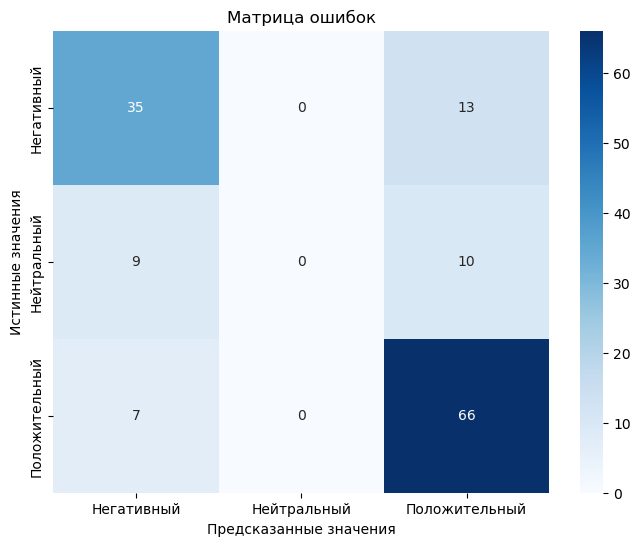

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_train_pred = sentiment_model.predict(X_train)
y_test_pred = sentiment_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Негативный', 'Нейтральный', 'Положительный'], yticklabels=['Негативный', 'Нейтральный', 'Положительный'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

In [89]:
metrics = {
    "Accuracy (Train)": accuracy_score(y_train, y_train_pred),
    "Accuracy (Test)": accuracy_score(y_test, y_test_pred),
    "Precision (Train)": precision_score(y_train, y_train_pred, average='weighted'),
    "Precision (Test)": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall (Train)": recall_score(y_train, y_train_pred, average='weighted'),
    "Recall (Test)": recall_score(y_test, y_test_pred, average='weighted'),
    "F1 Score (Train)": f1_score(y_train, y_train_pred, average='weighted'),
    "F1 Score (Test)": f1_score(y_test, y_test_pred, average='weighted')
}
a = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])
a

c:\Users\an23m\anaconda3\envs\app_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Score
Accuracy (Train),0.908929
Accuracy (Test),0.721429
Precision (Train),0.916720
Precision (Test),0.621971
Recall (Train),0.908929
Recall (Test),0.721429
F1 Score (Train),0.895736
F1 Score (Test),0.667292


### Активное обучение

In [ ]:
### 

Посмотрим на датасете

In [90]:
sentiment_analyzer = SentimentAnalyzer(sentiment_model)

In [91]:
if 'sentiment' not in df.columns:
        with ThreadPoolExecutor(max_workers=10) as executor:
            sentiments = list(executor.map(sentiment_analyzer.analyze, vectorized_texts))
        df['sentiment'] = sentiments
        print("Анализ тональности завершен и добавлен в 'sentiment'.")
        # Если нужно получить названия классов вместо числовых меток
        df['sentiment_label'] = df['sentiment'].replace(sentiment_analyzer.mapping)

Анализ тональности завершен и добавлен в 'sentiment'.


In [106]:
df

,object_id,comment_type,comment_time,author_id,profession_level_num,rating,comment_text,likes_num,dislikes_num,date_of_pars,hist_file_load_id,cleaned_text,vectorized_text,sentiment,sentiment_label
0,1004394051,/ugc/review,2024-08-21 08:40:36.511,6463yeagmbaugdkbp9y9ak6ckg,3,5.0,Плюсы: Вежливое обслуживание. Горячий кофе. Но...,1,0,2024-09-22 19:11:48+00:00,3,"['плюс', 'вежливый', 'обслуживание', 'горячий'...","[[0.18638138, -0.27080196, -0.3037158, -0.1582...",2,Положительный
1,1004394051,/ugc/review,2024-08-26 09:14:35.621,2zhrztyn3j9apk485nktey9e80,14,4.0,Был пару раз заправка как заправка только не в...,0,0,2024-09-22 19:11:48+00:00,3,"['пара', 'заправка', 'заправка', 'не', 'видно'...","[[-0.20863703, 0.135253, -0.48330638, -0.27861...",2,Положительный
2,1004394051,/ugc/review,2024-08-29 12:01:41.872,5p4zc3y74pk9ffcx7p071qtyf0,7,5.0,Всегда хорошие и веселые сотрудники. Вкусные х...,0,0,2024-09-22 19:11:48+00:00,3,"['всегда', 'хороший', 'весёлый', 'сотрудник', ...","[[-0.5377986, -0.6289255, -0.39644632, 0.14934...",2,Положительный
3,1004394051,/ugc/review,2024-09-02 20:16:11.641,0n0nz7jbj3tmnjj40q1bhv8cqg,6,5.0,Самая любимая заправка.,2,0,2024-09-22 19:11:48+00:00,3,"['самая', 'любимый', 'заправка']","[[-0.2938254, -0.2968786, -0.025342526, -0.337...",2,Положительный
4,1004394051,/ugc/review,2016-05-24 23:08:56.000,twzk2t9fk82w6pv5jcygmc6w84,8,1.0,Нет дизеля (((,4,0,2024-09-22 19:11:48+00:00,3,"['нет', 'дизель']","[[-0.25979453, -0.1136968, -0.1641698, -0.0325...",0,Негативный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168849,245596964645,/ugc/review,2019-10-19 20:08:37.754,vwgntqaxahaz9y9khh7z81ux98,27,5.0,Хорошая заправка!,4,0,2024-09-22 19:11:48+00:00,3,"['хороший', 'заправка']","[[-0.34992936, -0.3075621, -0.27499628, -0.098...",2,Положительный
168850,245596964645,/ugc/review,2019-10-20 13:57:04.892,z1ux877fph2qaj03gvmjmhjba4,12,2.0,Цена не радует,3,2,2024-09-22 19:11:48+00:00,3,"['цена', 'не', 'радовать']","[[0.05624003, -0.4158787, -0.039217323, -0.316...",0,Негативный
168851,245596964645,/ugc/review,2019-10-20 17:18:36.411,2je1h7qahnunwh9uz4kr8dpqwg,16,4.0,"Топливо, магазин, сервис на высоте.",6,1,2024-09-22 19:11:48+00:00,3,"['топливо', 'магазин', 'сервис', 'высота']","[[0.057401087, -0.69955, 0.550758, -0.18878664...",2,Положительный
168852,245596964645,/ugc/review,2019-10-22 13:08:08.705,y3k11xa99n2yjpuq7y82w856t8,12,5.0,Самая приветливая заправка)),3,1,2024-09-22 19:11:48+00:00,3,"['самая', 'приветливый', 'заправка']","[[-0.2938254, -0.2968786, -0.025342526, -0.337...",2,Положительный


In [107]:
df.columns

Index(['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'vectorized_text', 'sentiment', 'sentiment_label'],
      dtype='object')

In [109]:
df[['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'sentiment', 'sentiment_label']].to_csv('all_with_sentiment.csv', index=False)

In [99]:
df_rating_not_good = df[df['sentiment']!=2][['comment_text', 'rating','sentiment_label']]
df_rating_not_good

,comment_text,rating,sentiment_label
4,Нет дизеля (((,1.0,Негативный
5,"Горючее не качественное (говорю про 92й), расх...",1.0,Негативный
6,Нужно было заправиться. Находился весь день не...,1.0,Негативный
18,"люблю лукойл, только на лукойле и заправляюсь....",3.0,Негативный
21,Мне кажется что воруют на объеме залитого бенз...,4.0,Негативный
...,...,...,...
168835,Не удобный заезд для грузовиков!,3.0,Негативный
168839,"Качество топливо, без обмана.",5.0,Негативный
168840,Редкий случай там заправляюсь Толи после них ...,4.0,Негативный
168843,Не удобный подъезд,5.0,Негативный


In [100]:
df_rating_not_good[df_rating_not_good['rating']>3]

,comment_text,rating,sentiment_label
21,Мне кажется что воруют на объеме залитого бенз...,4.0,Негативный
27,"Качество бензина оценить не могу, но заправили...",5.0,Негативный
30,Неудобный заезд,4.0,Негативный
42,"Заправилась здесь, так как наша азс была закры...",5.0,Негативный
50,Все по стандартам лукойл. Единственная особенн...,5.0,Нейтральный
...,...,...,...
168824,Последнее время бензин не айс.,5.0,Негативный
168828,"Просто езжу мимо плюс когда то услышал, что у ...",5.0,Негативный
168839,"Качество топливо, без обмана.",5.0,Негативный
168840,Редкий случай там заправляюсь Толи после них ...,4.0,Негативный


### Сохранение модели SVM

In [101]:
import joblib
joblib.dump(sentiment_model, 'model\\svm_model.pkl')

['model\\svm_model.pkl']

### Ключевые слова

In [102]:
combined_vectors_array = np.load("C:\\Users\\an23m\\course_work\\app\\model\\combined_vectors.npy", allow_pickle=True).item()

In [103]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

themes = pd.read_sql_query("select title from testing.s_azs_categ order by title", conn)

cur.close()
conn.close()
themes

C:\Users\an23m\AppData\Local\Temp\ipykernel_17480\3073474894.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  themes = pd.read_sql_query("select title from testing.s_azs_categ order by title", conn)


,title
0,Бензин
1,Время ожидания
2,Газ
3,Кафе
4,Качество бензина
5,Качество газа
6,Качество топлива
7,Комната ожидания
8,Комфорт
9,Кофе


In [104]:
keywords = themes['title'].tolist()
keyword_extractor = KeywordExtractor(keywords, combined_vectors_array, preprocessor, vectorizer)

start KEYWORD


c:\Users\an23m\anaconda3\envs\app_env\Lib\site-packages\gensim\models\keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


end KEYWORD
Время выполнения: 9.214150190353394 секунд


In [110]:
if 'keywords' not in df.columns:
        with ThreadPoolExecutor(max_workers=10) as executor:
            keywords = list(executor.map(keyword_extractor.match_review_to_themes, vectorized_texts))
        df['keywords'] = keywords
        print("Выделение ключевых слов завершено и добавлено в 'keywords'.")

Выделение ключевых слов завершено и добавлено в 'keywords'.


In [130]:
df_check = df.groupby('comment_text')['sentiment'].mean()
df_check.isin([0,1,2])
invalid_values_exist = ~df_check.isin([0, 1, 2]).all()
invalid_values_exist

False

In [122]:
df[df['keywords'].str.len() > 0][['comment_text', 'rating', 'sentiment', "keywords"]]

,comment_text,rating,sentiment,keywords
0,Плюсы: Вежливое обслуживание. Горячий кофе. Но...,5.0,2,[кофе]
7,Заправка закрыта на ремонт,1.0,2,[ремонт]
8,Обновленная заправка. Ремонт был в ноябре. Ест...,5.0,2,[ремонт]
14,Отличная заправка в тихом месте с магазин и ку...,5.0,2,[магазин]
16,После ремонта все отлично у них,5.0,2,[ремонт]
...,...,...,...,...
168838,Оригинальная заправка с хорошим топливом.,5.0,2,"[бензин, качество бензин, качество топливо]"
168839,"Качество топливо, без обмана.",5.0,0,"[бензин, качество бензин, качество газ, качест..."
168841,Вежливое обслуживание.,5.0,2,[обслуживание]
168842,"Все отлично. Удобное расположение, квалифицир...",5.0,2,"[качество бензин, качество топливо]"


In [111]:
df.columns

Index(['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'vectorized_text', 'sentiment', 'sentiment_label', 'keywords'],
      dtype='object')

In [112]:
df[['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'sentiment', 'sentiment_label', 'keywords']].to_csv('all_processed.csv', index=False)

Загрузка в БД

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168854 entries, 0 to 168853
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   object_id             168854 non-null  int64  
 1   comment_type          168854 non-null  object 
 2   comment_time          168854 non-null  object 
 3   author_id             168854 non-null  object 
 4   profession_level_num  168854 non-null  int64  
 5   rating                168711 non-null  float64
 6   comment_text          168854 non-null  object 
 7   likes_num             168854 non-null  int64  
 8   dislikes_num          168854 non-null  int64  
 9   date_of_pars          168854 non-null  object 
 10  hist_file_load_id     168854 non-null  int64  
 11  cleaned_text          168854 non-null  object 
 12  vectorized_text       168854 non-null  object 
 13  sentiment             168854 non-null  int64  
 14  sentiment_label       168854 non-null  object 
 15  

In [133]:
import hashlib
df['review_hash'] = df['comment_text'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [185]:
# Переименование столбцов для соответствия структуре таблицы
df_for_db = df.rename(columns={
    'comment_text': 'comment_text',
    'cleaned_text': 'clean_text',
    'sentiment': 'sentiment_score',
    'sentiment_label': 'sentiment',
    'keywords': 'keywords'
})

In [186]:
df_for_db.head(1)

,object_id,comment_type,comment_time,author_id,profession_level_num,rating,comment_text,likes_num,dislikes_num,date_of_pars,hist_file_load_id,clean_text,vectorized_text,sentiment_score,sentiment,keywords,review_hash
0,1004394051,/ugc/review,2024-08-21 08:40:36.511,6463yeagmbaugdkbp9y9ak6ckg,3,5.0,Плюсы: Вежливое обслуживание. Горячий кофе. Но...,1,0,2024-09-22 19:11:48+00:00,3,"['плюс', 'вежливый', 'обслуживание', 'горячий'...","[[0.18638138, -0.27080196, -0.3037158, -0.1582...",2,Положительный,[кофе],1afdaef12fbb6d8a6d87d3f4ab84d144


In [187]:
def parse_string_to_list(string_value):
    # Если значение уже является списком, просто возвращаем его
    if isinstance(string_value, list):
        return string_value
    # Если это строка, пытаемся преобразовать её в список
    elif isinstance(string_value, str):
        try:
            return ast.literal_eval(string_value) if string_value else []
        except (ValueError, SyntaxError):
            return []  # Возвращаем пустой список, если не удается преобразовать строку
    return []

In [189]:
values = [(row['review_hash'], 
           row['comment_text'], 
           row['clean_text'], 
           row['sentiment'], 
           row['sentiment_score'], 
           parse_string_to_list(row['keywords'])
           ) 
          for index, row in df_for_db.iterrows()]

values

[('1afdaef12fbb6d8a6d87d3f4ab84d144',
  'Плюсы: Вежливое обслуживание. Горячий кофе. Нормальный бензин. Имеется пара парковочных мест, чтобы выпить кофе. ',
  "['плюс', 'вежливый', 'обслуживание', 'горячий', 'кофе', 'нормальный', 'бензин', 'иметься', 'пара', 'парковочный', 'место', 'выпить', 'кофе']",
  'Положительный',
  2,
  ['кофе']),
 ('de33cd4c61989ab888f68d7662657b80',
  'Был пару раз заправка как заправка только не видно с проезжей части',
  "['пара', 'заправка', 'заправка', 'не', 'видно', 'проезжий', 'часть']",
  'Положительный',
  2,
  []),
 ('1ac2105d9bd6a0f613b891bfb1300b1a',
  'Всегда хорошие и веселые сотрудники. Вкусные хот-доги и недалеко от дома.',
  "['всегда', 'хороший', 'весёлый', 'сотрудник', 'вкусный', 'хот', 'дог', 'недалеко', 'дом']",
  'Положительный',
  2,
  []),
 ('8ced8ee596219778ab6883b97907cffe',
  'Самая любимая заправка. ',
  "['самая', 'любимый', 'заправка']",
  'Положительный',
  2,
  []),
 ('a0969f412a403d15973bd4ce52cb5a6b',
  'Нет дизеля (((',
  "['н

In [194]:
values[4]

('a0969f412a403d15973bd4ce52cb5a6b',
 'Нет дизеля (((',
 "['нет', 'дизель']",
 'Негативный',
 0,
 [])

In [191]:
type(values[4][5])

list

In [196]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

cur.execute('TRUNCATE TABLE "buffer"."azs_review_analysis" CASCADE')

insert_query = """
    INSERT INTO buffer.azs_review_analysis (
        review_hash, comment_text, clean_text, sentiment, sentiment_score, keywords
    ) VALUES (%s, %s, %s, %s, %s, %s)
"""

# Выполнение вставки данных
cur.executemany(insert_query, values)

# Подтверждаем транзакцию и закрываем соединение
conn.commit()

cur.execute("select testing.fn_load_analyzed_reviews()")

cur.close()
conn.close()

### Графики

In [13]:
import psycopg2
import pandas as pd
def get_analyzed_reviews(db_host, db_name, db_user, db_password):
    try:
        with psycopg2.connect(
            host=db_host,
            database=db_name,
            user=db_user,
            password=db_password
            ) as conn:
            with conn.cursor() as cur: 
                df = pd.read_sql_query("""select ai.object_id, ai.rating as azs_rating, address, region, profession_level_num, 
                                            ar.rating as review_rating, ar.comment_text, ar.comment_time, sentiment, sentiment_score, keywords, clean_text
                                            from testing.azs_info as ai 
                                            join testing.azs_review as ar 
                                            on ai.object_id = ar.object_id 
                                            left join testing.azs_review_analysis as a 
                                            on md5(ar.comment_text) = a.review_hash
                                            where ar.date_of_pars = (select max(date_of_pars) from testing.azs_review);""", conn) 
                return df
                
    except Exception as e:
        print(f"Error with connection or cursor: {e}" )
        return pd.DataFrame()

In [14]:
db_host = "localhost"
db_name = "azs"
db_user = "postgres"
db_password = "f8ysz789"

In [15]:
df = get_analyzed_reviews(db_host, db_name, db_user, db_password)

C:\Users\an23m\AppData\Local\Temp\ipykernel_9176\1175793072.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""select ai.object_id, ai.rating as azs_rating, address, region, profession_level_num,


In [16]:
df.head(2)

,object_id,azs_rating,address,region,profession_level_num,review_rating,comment_text,comment_time,sentiment,sentiment_score,keywords,clean_text
0,1025894608,4.4,"Коптевская ул., 69А, Москва",Москва,4,1.0,Приехала утром за кофе и испортила настроение ...,2022-03-26 11:21:38.090,Негативный,0,[],"['приехать', 'утро', 'кофе', 'испортить', 'нас..."
1,1025894608,4.4,"Коптевская ул., 69А, Москва",Москва,9,5.0,Вежливое обслуживание! Хорошая заправка! Есть ...,2022-05-12 11:55:19.724,Положительный,2,[],"['вежливый', 'обслуживание', 'хороший', 'запра..."


In [11]:
import matplotlib.pyplot as plt

In [24]:
positive_reviews[:1000]

'приехать утро кофе испортить настроение весь день припарковаться сбоку колонка собственно останавливаться весь клиент которые заправка купить кофе садиться машина видеть картина женщина орет заправщица ставить ограждение дабы клиент не смочь останавливаться далее женщина подходить не поздоровавшись не представиться остервенелый лицо начать говорить убрать машина задать вопрос сказать менеджер данного заведение задавать следующий вопрос причина разговаривать сом свой клиент ответить своё лицо видеть ответить чтооо просьба владелец обратить внимание свой менеджер женщина бмв светлый волос грубый наглый совершенно неадекватный баба другого слово не подобрать нога заправка не компактный приятный заправка туалет магазин минус находиться возле куча автосалон нет сотый бензин заливать 95 разумно не весь новый машина не работать топливный карта именно лукойл не берите карта никогда заправлялся нет желание пользоваться слово вообще сеть заправка лукойл свой машина жалко брать солярка 150 литр 

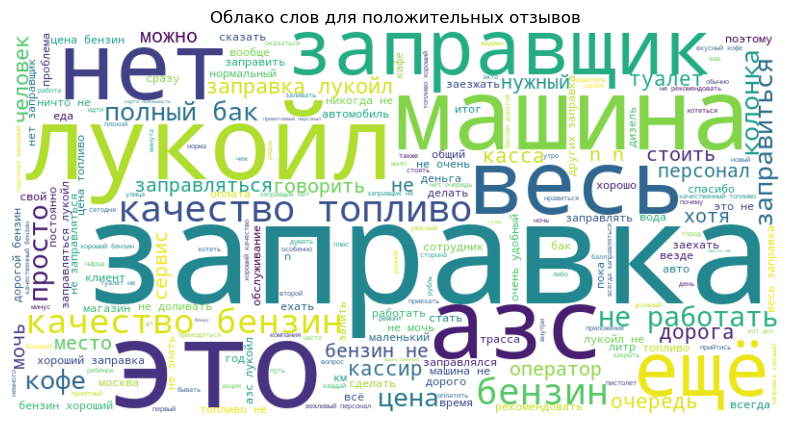

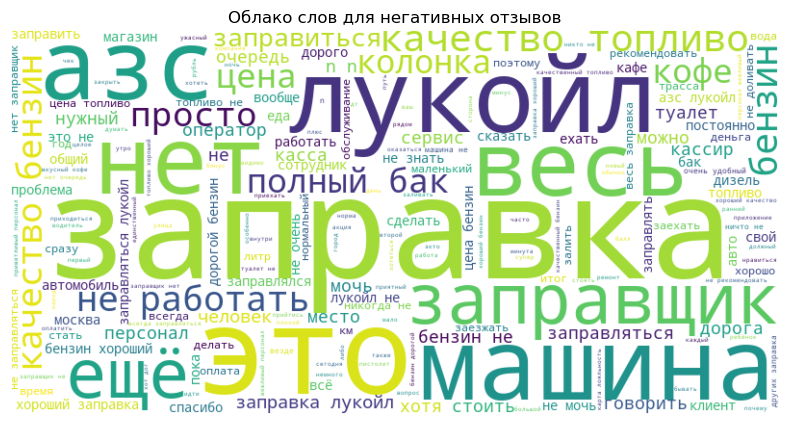

In [25]:
from wordcloud import WordCloud
# positive_reviews = ' '.join(st.session_state.reviews_df[st.session_state.reviews_df['sentiment'] == 2]['cleaned_text'])
positive_reviews = ' '.join(df[df['sentiment_score'] == 0]['clean_text']).replace('[','').replace("'",'').replace(',','').replace(']','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов для положительных отзывов")
plt.show()

negative_reviews = ' '.join(df[df['sentiment_score'] == 0]['clean_text']).replace('[','').replace("'",'').replace(',','').replace(']','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов для негативных отзывов")
plt.show()

In [27]:
import seaborn as sns

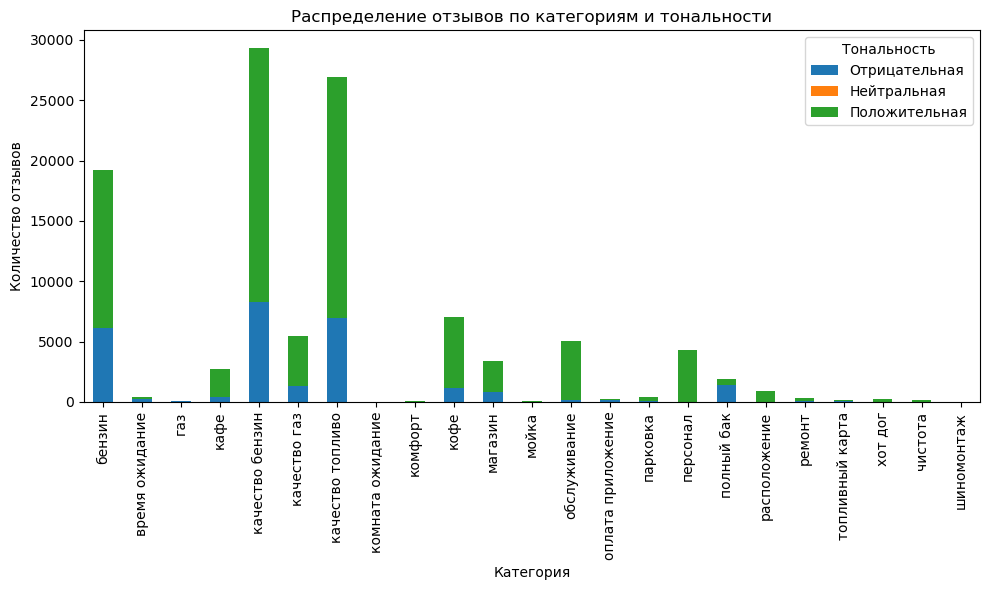

In [82]:
exploded_df = df.explode('keywords')
sentiment_distribution = exploded_df.groupby(['keywords', 'sentiment_score']).size().unstack(fill_value=0)

# Инициализация фигуры
fig, ax = plt.subplots(figsize=(10, 6))

sentiment_distribution.plot(kind='bar', stacked=True, ax=ax)  # Указываем ax для построения на ранее созданной фигуре
ax.set_title('Распределение отзывов по категориям и тональности')
ax.set_xlabel('Категория')
ax.set_ylabel('Количество отзывов')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(title='Тональность', labels=['Отрицательная', 'Нейтральная', 'Положительная'])
plt.tight_layout()
plt.show()

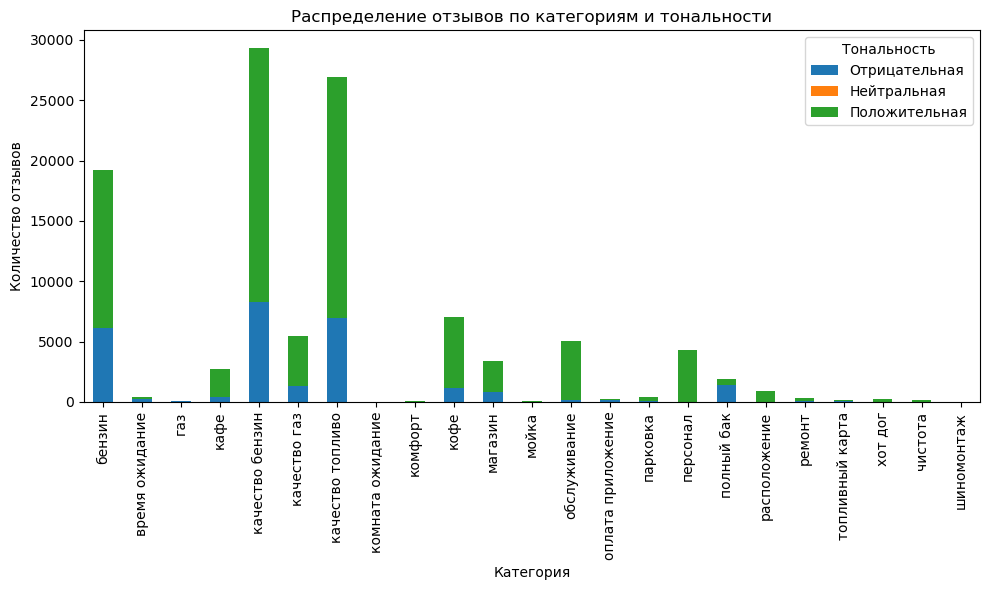

In [30]:
# Разворачиваем колонку keywords, чтобы каждая категория была в отдельной строке
exploded_df = df.explode('keywords')
sentiment_distribution = exploded_df.groupby(['keywords', 'sentiment_score']).size().unstack(fill_value=0)
# учесть что в keywords лежит список, может быть несколько слов
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение отзывов по категориям и тональности')
plt.xlabel('Категория')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=90)
plt.legend(title='Тональность', labels=['Отрицательная', 'Нейтральная', 'Положительная'])
plt.tight_layout()
plt.show()

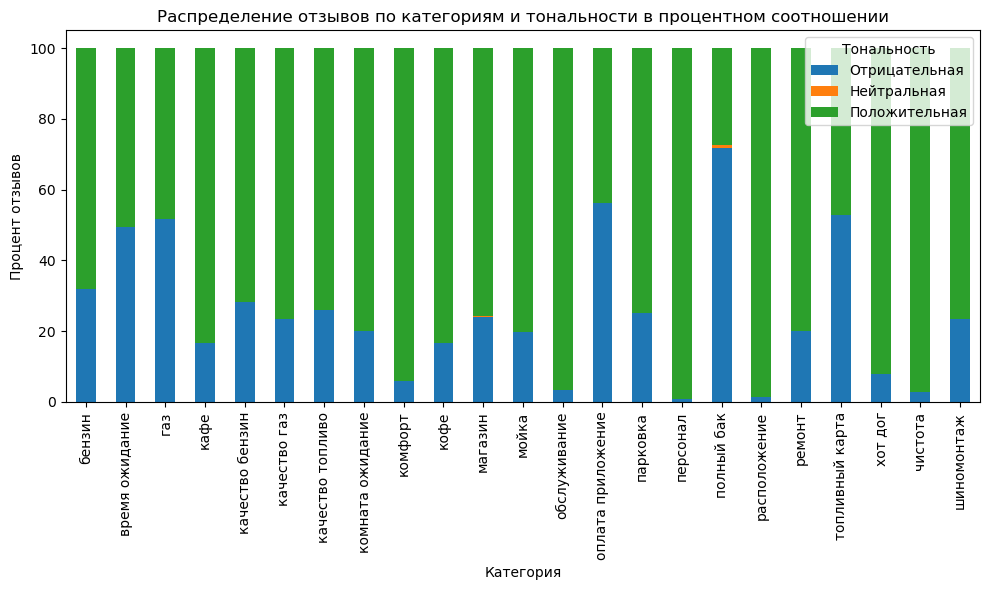

In [32]:
sentiment_distribution_percent = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Построение графика
sentiment_distribution_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение отзывов по категориям и тональности в процентном соотношении')
plt.xlabel('Категория')
plt.ylabel('Процент отзывов')
plt.xticks(rotation=90)
plt.legend(title='Тональность', labels=['Отрицательная', 'Нейтральная', 'Положительная'])
plt.tight_layout()
plt.show()

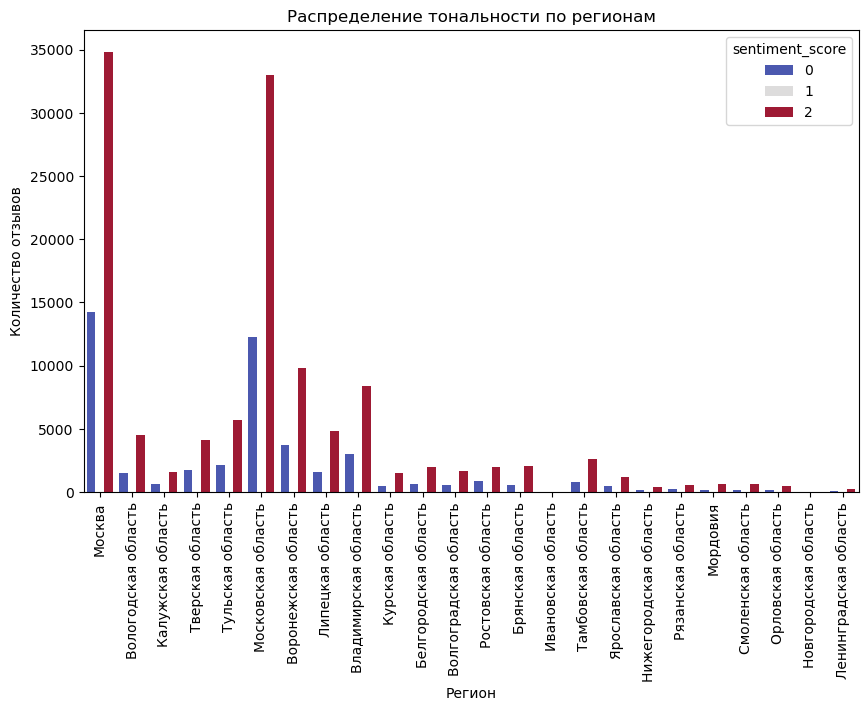

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='sentiment_score', palette='coolwarm')
plt.title("Распределение тональности по регионам")
plt.xlabel("Регион")
plt.ylabel("Количество отзывов")
plt.xticks(rotation=90)
plt.show()

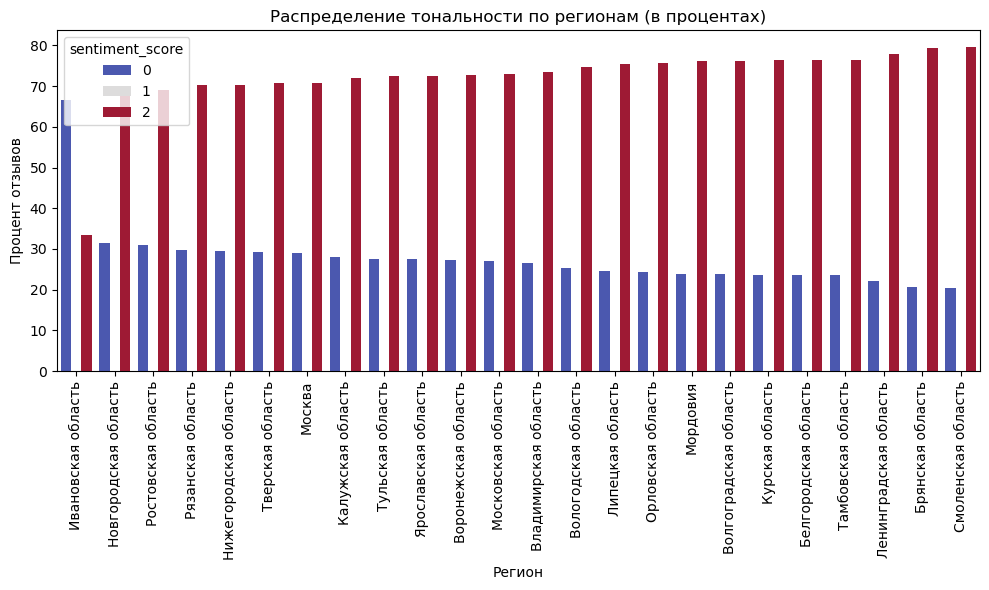

In [40]:
# Вычисляем количество отзывов по каждому региону и тональности
region_sentiment_counts = df.groupby(['region', 'sentiment_score']).size().unstack(fill_value=0)

# Преобразуем количество в проценты для каждого региона
region_sentiment_percent = region_sentiment_counts.div(region_sentiment_counts.sum(axis=1), axis=0) * 100

# Сортируем регионы по проценту положительных отзывов (предполагаем, что положительная тональность = 1)
region_sentiment_percent = region_sentiment_percent.sort_values(by=0, ascending=False)

# Преобразуем данные для построения графика в нужном формате
region_sentiment_percent = region_sentiment_percent.reset_index().melt(id_vars='region', var_name='sentiment_score', value_name='percentage')

# Построение графика с процентами
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sentiment_percent, x='region', y='percentage', hue='sentiment_score', palette='coolwarm')
plt.title("Распределение тональности по регионам (в процентах)")
plt.xlabel("Регион")
plt.ylabel("Процент отзывов")
plt.xticks(rotation=90)
# plt.legend(title='Тональность', labels=['Отрицательная', 'Нейтральная', 'Положительная'])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Процент негативных отзывов')

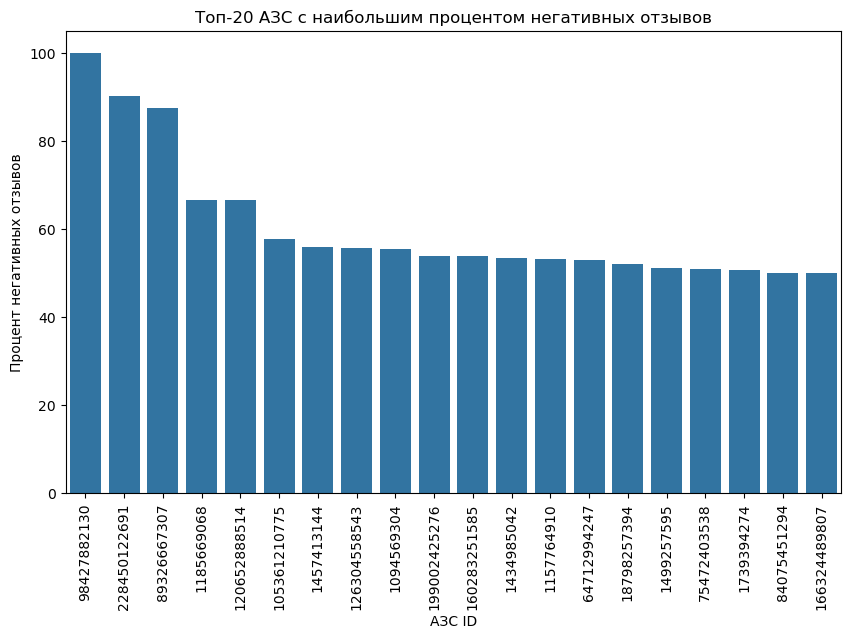

In [56]:
review_counts = df.groupby('object_id').agg(
total_reviews=('sentiment_score', 'size'),
negative_reviews=('sentiment_score', lambda x: (x == 0).sum()),
neutral_reviews=('sentiment_score', lambda x: (x == 1).sum()),
positive_reviews=('sentiment_score', lambda x: (x == 2).sum()),
).reset_index()

# Вычисляем процент отзывов для каждой АЗС
review_counts['negative_ratio'] = review_counts['negative_reviews'] / review_counts['total_reviews'] * 100
review_counts['neutral_ratio'] = review_counts['neutral_reviews'] / review_counts['total_reviews'] * 100
review_counts['positive_ratio'] = review_counts['positive_reviews'] / review_counts['total_reviews'] * 100


# Сортируем по проценту негативных отзывов в порядке убывания
top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# Построение графика с указанием порядка столбцов по `object_id` из `top_negative`
plt.figure(figsize=(10, 6))
sns.barplot(data=top_negative, x='object_id', y='negative_ratio', order=top_negative['object_id'])
plt.title("Топ-20 АЗС с наибольшим процентом негативных отзывов")
plt.xlabel("АЗС ID")
plt.xticks(rotation=90)
plt.ylabel("Процент негативных отзывов")

Text(0, 0.5, 'Процент негативных отзывов')

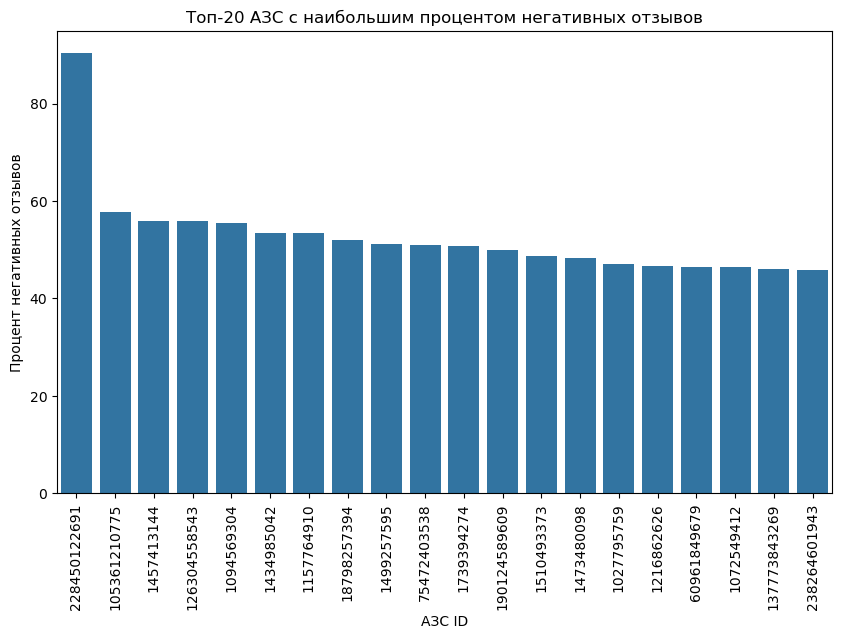

In [ ]:
# Группируем данные по object_id и рассчитываем статистики
review_counts = df.groupby('object_id').agg(
    total_reviews=('sentiment_score', 'size'),
    negative_reviews=('sentiment_score', lambda x: (x == 0).sum()),
    neutral_reviews=('sentiment_score', lambda x: (x == 1).sum()),
    positive_reviews=('sentiment_score', lambda x: (x == 2).sum()),
).reset_index()

# Фильтруем только те АЗС, где общее количество отзывов больше или равно 20
review_counts = review_counts[review_counts['total_reviews'] >= 20]

# Вычисляем процент отзывов для каждой АЗС
review_counts['negative_ratio'] = review_counts['negative_reviews'] / review_counts['total_reviews'] * 100
review_counts['neutral_ratio'] = review_counts['neutral_reviews'] / review_counts['total_reviews'] * 100
review_counts['positive_ratio'] = review_counts['positive_reviews'] / review_counts['total_reviews'] * 100

# Сортируем по проценту негативных отзывов в порядке убывания
top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# Построение графика с указанием порядка столбцов по `object_id` из `top_negative`
plt.figure(figsize=(10, 6))
sns.barplot(data=top_negative, x='object_id', y='negative_ratio', order=top_negative['object_id'])
plt.title("Топ-20 АЗС с наибольшим процентом негативных отзывов")
plt.xlabel("АЗС ID")
plt.xticks(rotation=90)
plt.ylabel("Процент негативных отзывов")
# количество отзывов не меньше 20

In [83]:
exploded_df = df.explode('keywords')
negative_reviews = exploded_df[exploded_df['sentiment_score'] == 0]

# Группируем по 'object_id' и 'keywords', чтобы посчитать количество негативных отзывов по категориям
category_counts = negative_reviews.groupby(['object_id', 'keywords']).size().unstack().fillna(0)

# # Получаем топ-20 АЗС с наибольшим процентом негативных отзывов
# top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# Отображаем категории для этих топовых АЗС
# Используем 'object_id' из top_negative для фильтрации в category_counts
top_negative_categories = category_counts.loc[category_counts.index.isin(top_negative['object_id'])]

# Отображаем данные
print("Категории с наибольшим количеством негативных отзывов для топ-20 АЗС")
top_negative_categories

Категории с наибольшим количеством негативных отзывов для топ-20 АЗС


keywords,бензин,время ожидание,газ,кафе,качество бензин,качество газ,качество топливо,комната ожидание,комфорт,кофе,...,оплата приложение,парковка,персонал,полный бак,расположение,ремонт,топливный карта,хот дог,чистота,шиномонтаж
object_id,,,,,,,,,,,,,,,,,,,,,
1027795759,13.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,...,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
1072549412,5.0,0.0,0.0,1.0,7.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
1094569304,15.0,0.0,0.0,0.0,17.0,1.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0
1157764910,8.0,0.0,0.0,0.0,7.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216862626,4.0,1.0,0.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1434985042,26.0,1.0,1.0,1.0,30.0,8.0,24.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0
1457413144,5.0,0.0,0.0,1.0,8.0,1.0,7.0,0.0,0.0,1.0,...,0.0,0.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0
1473480098,14.0,0.0,2.0,0.0,18.0,6.0,18.0,0.0,0.0,2.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
1499257595,15.0,1.0,1.0,0.0,19.0,2.0,12.0,0.0,0.0,3.0,...,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


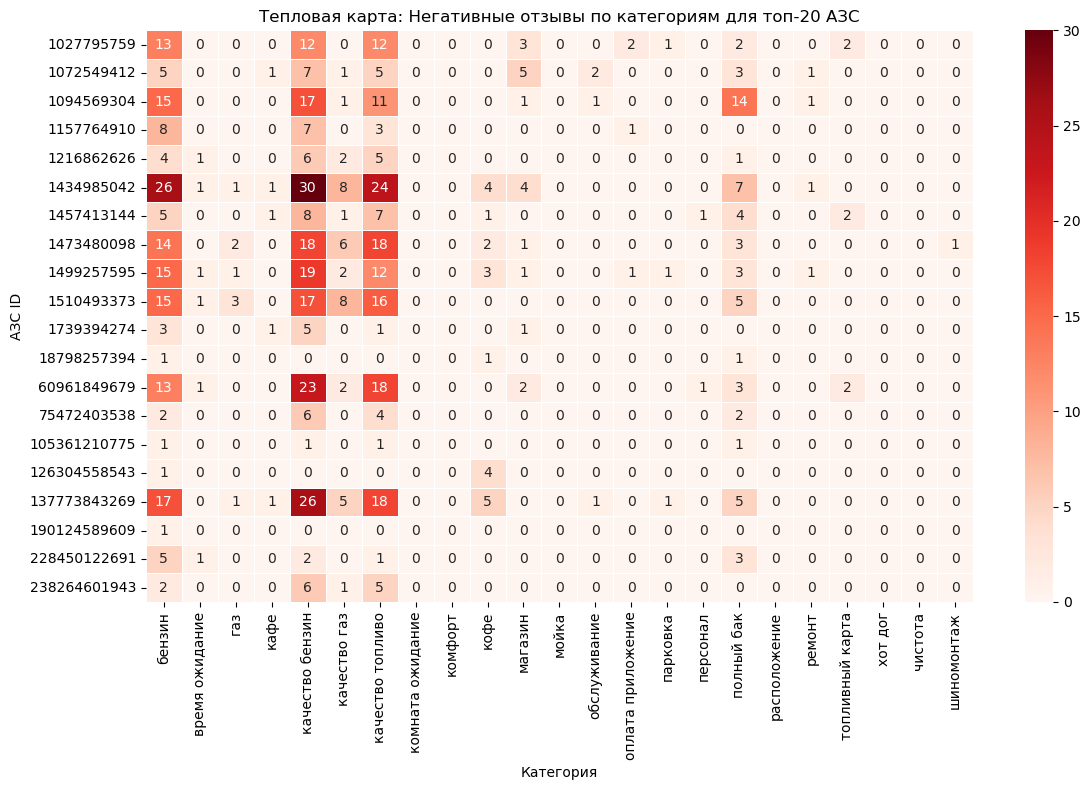

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(top_negative_categories, annot=True, cmap='Reds', fmt='g', linewidths=0.5)
plt.title("Тепловая карта: Негативные отзывы по категориям для топ-20 АЗС")
plt.xlabel("Категория")
plt.ylabel("АЗС ID")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# Получаем данные категорий для топ-20 самых плохих АЗС
top_negative_categories = category_counts.loc[category_counts.index.isin(top_negative_azs['object_id'])]

# Суммируем количество негативных отзывов по каждой категории для этих АЗС
category_sums = top_negative_categories.sum(axis=0)

# Сортируем категории по количеству негативных отзывов
sorted_categories = category_sums.sort_values(ascending=False)

# Выводим для визуализации
st.subheader("Категории с наибольшим количеством негативных отзывов для самых плохих АЗС")
st.write(sorted_categories)

распределение по дням недели

In [ ]:
# Добавляем колонку с днем недели
df['day_of_week'] = df['date'].dt.day_name()

# Группируем по дням недели и считаем количество отзывов
day_of_week_counts = df.groupby('day_of_week').size()

# Сортируем по порядку дней недели
day_of_week_counts = day_of_week_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Blues')
plt.title('Распределение отзывов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество отзывов')
plt.tight_layout()
st.pyplot(plt)


по времени суток

In [ ]:
# Добавляем колонку с часом отзыва
df['hour'] = df['date'].dt.hour

# Группируем по часам и считаем количество отзывов
hourly_counts = df.groupby('hour').size()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='green')
plt.title('Распределение отзывов по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество отзывов')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
st.pyplot(plt)


Количество отзывов по месяцам (анализ сезонности)

In [ ]:
# Добавляем колонку с месяцем
df['month'] = df['date'].dt.month

# Группируем по месяцам и считаем количество отзывов
monthly_counts = df.groupby('month').size()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Количество отзывов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество отзывов')
plt.xticks(range(12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.tight_layout()
st.pyplot(plt)


Сравнение тональности отзывов для различных ключевых слов по времени

# Группируем по времени и ключевому слову, считаем количество по тональности
keyword_sentiment_hour_counts = exploded_df.groupby(['hour', 'keywords', 'sentiment_score']).size().unstack(fill_value=0)

# Построение графика
plt.figure(figsize=(14, 8))
keyword_sentiment_hour_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Тональность отзывов по ключевым словам и времени суток')
plt.xlabel('Час дня')
plt.ylabel('Частота')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
st.pyplot(plt)


Экспорт в пдф

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from io import BytesIO

In [70]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from datetime import datetime
# Создание имени файла с меткой времени
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
pdf_filename = f"review_report_{timestamp}.pdf"
pdf = PdfPages(pdf_filename)